In [ ]:
# import modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
# mnist
mnist = keras.datasets.mnist
(tX, ty), (vX, vy) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# normalizing pixel values

tX = tX.astype('float32')/255
vX = vX.astype('float32')/255

In [ ]:
# checking image format

from keras import backend as k

img_row, img_col = 28, 28

# check for channels first
if k.image_data_format() == 'channels_first':

  tX = tX.reshape(tX.shape[0], 1, img_row, img_col)
  vX = vX.reshape(vX.shape[0], 1, img_row, img_col)
  imgpx = (1, img_row, img_col)

else:

  tX = tX.reshape(tX.shape[0], img_row, img_col, 1)
  vX = vX.reshape(vX.shape[0], img_row, img_col, 1)
  imgpx = (img_row, img_col, 1)

In [ ]:
# convert the ty and vy to categorical variables so just like label encoding

ty = tf.keras.utils.to_categorical(ty)
vy = tf.keras.utils.to_categorical(vy)

In [ ]:
# now that we have preprocessed data, we have to find the optimal model

# model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

# first is how many layers do we need, 1,2,3,4?
models = [0,0,0,0]

for i in range(4):

  models[i] = keras.Sequential()
  # as we are trying for 4 layers, reducing size will be an issue, hence add padding
  models[i].add(Conv2D(24, (5, 5), padding='same', activation='relu', input_shape=imgpx))
  models[i].add(MaxPooling2D((2, 2)))

  if i>0:
    models[i].add(Conv2D(48, (5, 5), padding='same', activation='relu'))
    models[i].add(MaxPooling2D((2,2)))

  if i>1:
    models[i].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
    models[i].add(MaxPooling2D((2,2)))

  if i>2:
    models[i].add(Conv2D(96,kernel_size=5,padding='same',activation='relu'))
    models[i].add(MaxPooling2D((2,2)))

  models[i].add(Flatten())
  models[i].add(Dense(256, activation='relu'))
  models[i].add(Dense(10, activation='softmax'))
  models[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_names = ['1 Conv', '2 Conv', '3 Conv', '4 Conv']
h = [0, 0, 0, 0]
for i in range(4):
  h[i] = models[i].fit(tX, ty, batch_size=100, epochs=15, validation_data=(vX, vy), verbose=0)
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        model_names[i], 15, max(h[i].history['accuracy']), max(h[i].history['val_accuracy']) ))

CNN 1 Conv: Epochs=15, Train accuracy=1.00000, Validation accuracy=0.99180
CNN 2 Conv: Epochs=15, Train accuracy=0.99928, Validation accuracy=0.99290
CNN 3 Conv: Epochs=15, Train accuracy=0.99842, Validation accuracy=0.99330
CNN 4 Conv: Epochs=15, Train accuracy=0.99770, Validation accuracy=0.99350


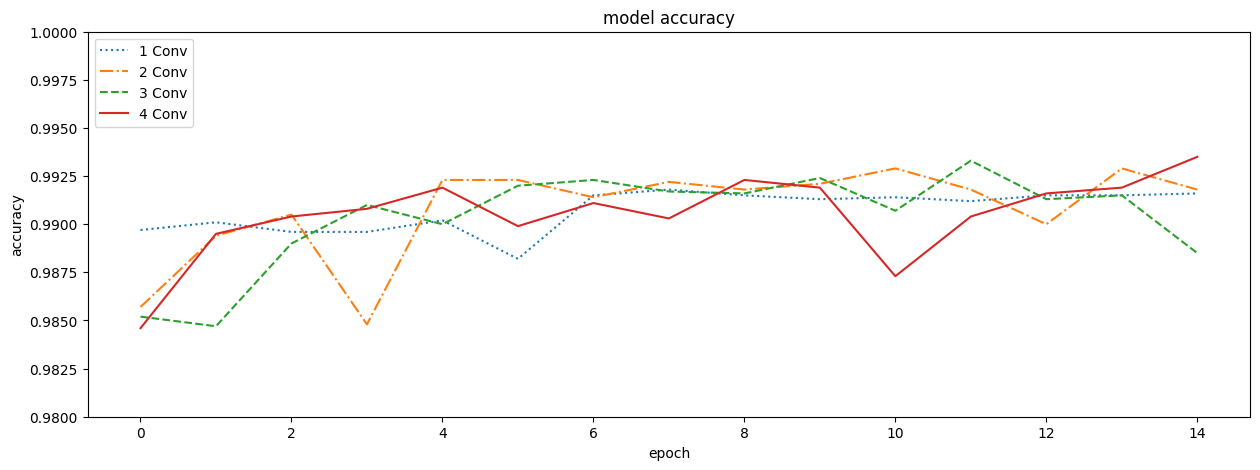

In [ ]:
# plotting accuracies

line_styles = [':','-.','--','-',':','-.','--','-',':','-.','--','-']

plt.figure(figsize=(15,5))
for i in range(4):
    plt.plot(h[i].history['val_accuracy'],linestyle=line_styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(model_names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [ ]:
# using 4 layers increases computational time hence we can use 3
# in my basic mnist I used 2 layers and you can see accuracy has increased, but here it has overfit on data so next let's find the right dropout

model1 = [0, 0, 0, 0, 0, 0, 0, 0]

for i in range(8):
  model1[i] = keras.Sequential()

  model1[i].add(Conv2D(24, (5, 5), padding='same', activation='relu', input_shape=imgpx))
  model1[i].add(MaxPooling2D((2, 2)))
  model1[i].add(Dropout(i*0.1))

  model1[i].add(Conv2D(48, (5, 5), padding='same', activation='relu'))
  model1[i].add(MaxPooling2D((2, 2)))
  model1[i].add(Dropout(i*0.1))

  model1[i].add(Conv2D(64, (5, 5), padding='same', activation='relu'))
  model1[i].add(MaxPooling2D((2, 2)))

  model1[i].add(Flatten())
  model1[i].add(Dense(128, activation='relu'))
  model1[i].add(Dropout(i*0.1))
  model1[i].add(Dense(10, activation='softmax'))
  model1[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1_names = ["0","0.1","0.2","0.3","0.4","0.5","0.6","0.7"]
h1 = [0, 0, 0, 0, 0, 0, 0, 0]

for i in range(8):
    h1[i] = model1[i].fit(tX, ty, batch_size=80, epochs = 20, validation_data = (vX, vy), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        model1_names[i], 20, max(h1[i].history['accuracy']), max(h1[i].history['val_accuracy']) ))

CNN 0: Epochs=20, Train accuracy=0.99862, Validation accuracy=0.99440
CNN 0.1: Epochs=20, Train accuracy=0.99767, Validation accuracy=0.99410
CNN 0.2: Epochs=20, Train accuracy=0.99663, Validation accuracy=0.99440
CNN 0.3: Epochs=20, Train accuracy=0.99505, Validation accuracy=0.99460
CNN 0.4: Epochs=20, Train accuracy=0.99193, Validation accuracy=0.99470
CNN 0.5: Epochs=20, Train accuracy=0.98773, Validation accuracy=0.99420
CNN 0.6: Epochs=20, Train accuracy=0.98122, Validation accuracy=0.99390
CNN 0.7: Epochs=20, Train accuracy=0.97027, Validation accuracy=0.99270


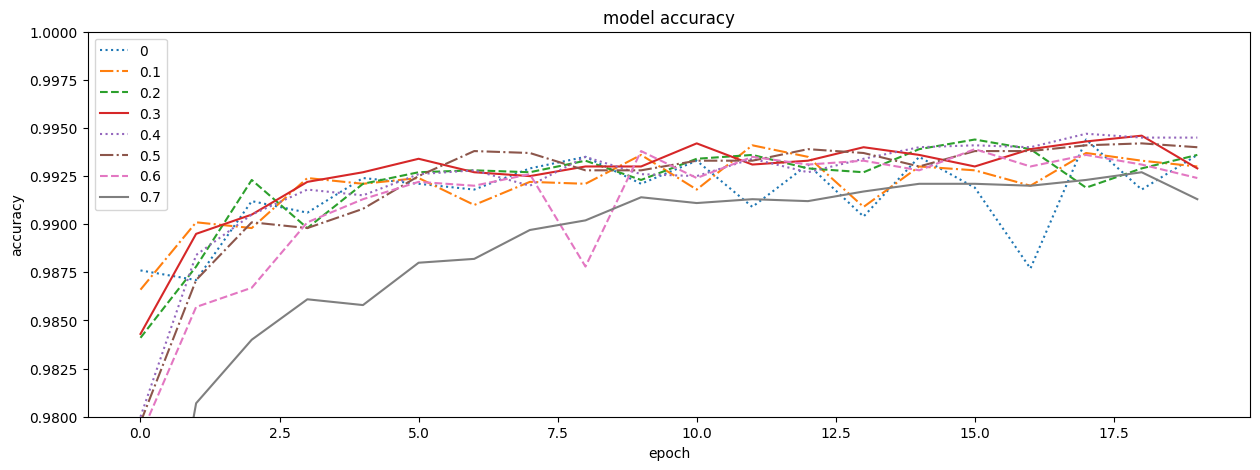

In [23]:
plt.figure(figsize=(15,5))
for i in range(8):
    plt.plot(h1[i].history['val_accuracy'],linestyle=line_styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(model1_names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [ ]:
# dropout of 0.4 produced highest accuracy on validation
# now we solved 2, next how many dense neurons? and how many filters?

# let's do optimal number of filters - our accuracy for 2 conv layers increased by 0.5 aprox, but we can settle with 0.992 accuracy and
# use 2 conv layers for less computational time. We can have 8, 16 or 32, 64 and so on but we shall limit it to 128

model2 = [0]*8
# we usually dont use 40 and 56

for i in range(8):

  model2[i] = keras.Sequential()

  model2[i].add(Conv2D(8*i+8, (5, 5), padding='same', activation='relu', input_shape=imgpx))
  model2[i].add(MaxPooling2D((2, 2)))

  model2[i].add(Conv2D(16*i+16, (5, 5), padding='same', activation='relu'))
  model2[i].add(MaxPooling2D((2, 2)))

  model2[i].add(Flatten())
  model2[i].add(Dense(256, activation='relu'))
  model2[i].add(Dense(10, activation='softmax'))
  model2[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model2_names = ['8', '16', '24', '32', '40', '48', '56', '64']
h2 = [0, 0, 0, 0, 0, 0, 0, 0]

for i in range(8):
  h2[i] = model2[i].fit(tX, ty, batch_size=80, epochs = 20, validation_data = (vX, vy), verbose=0)
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        model2_names[i], 20, max(h2[i].history['accuracy']), max(h2[i].history['val_accuracy']) ))

CNN 8: Epochs=20, Train accuracy=0.99935, Validation accuracy=0.99210
CNN 16: Epochs=20, Train accuracy=0.99965, Validation accuracy=0.99310
CNN 24: Epochs=20, Train accuracy=0.99967, Validation accuracy=0.99410
CNN 32: Epochs=20, Train accuracy=0.99937, Validation accuracy=0.99360
CNN 40: Epochs=20, Train accuracy=0.99937, Validation accuracy=0.99340
CNN 48: Epochs=20, Train accuracy=0.99957, Validation accuracy=0.99430
CNN 56: Epochs=20, Train accuracy=0.99947, Validation accuracy=0.99380
CNN 64: Epochs=20, Train accuracy=0.99948, Validation accuracy=0.99350


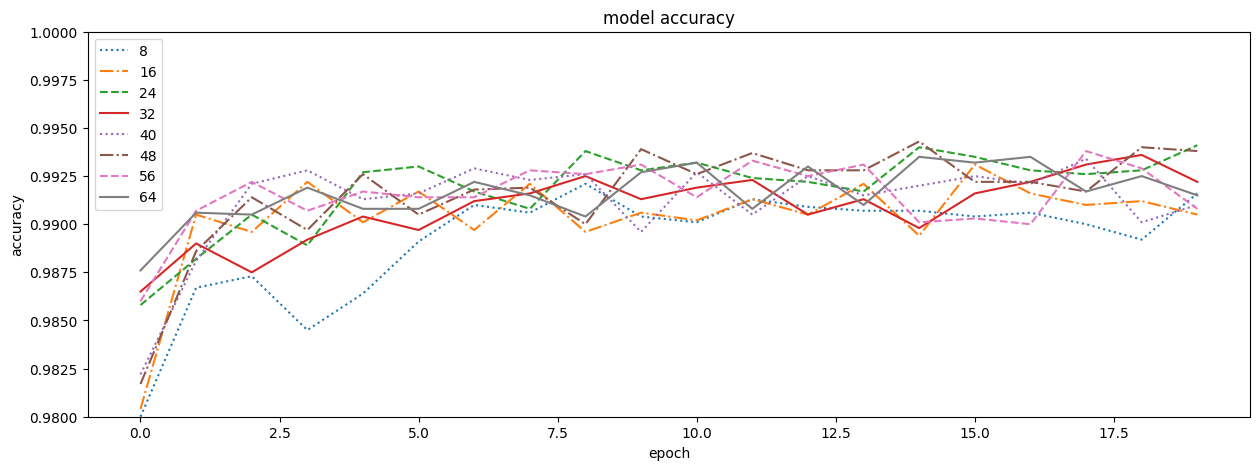

In [24]:
plt.figure(figsize=(15,5))
for i in range(8):
    plt.plot(h2[i].history['val_accuracy'],linestyle=line_styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(model2_names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [25]:
# how large a dense layer?
# from 0, 32, 64..., 1024

model3 = [0]*7

for i in range(7):
  model3[i] = keras.Sequential()

  model3[i].add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=imgpx))
  model3[i].add(MaxPooling2D((2, 2)))
  model3[i].add(Conv2D(64, (5, 5), padding='same', activation='relu'))
  model3[i].add(MaxPooling2D((2, 2)))
  model3[i].add(Flatten())

  if i>0:
    model3[i].add(Dense(2**(i+4), activation='relu'))

  model3[i].add(Dense(10, activation='softmax'))
  model3[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
h3 = [0] * 7
model3_names = ['0', '32', '64', '128', '256', '512', '1024']

for i in range(7):
    h3[i] = model3[i].fit(tX, ty, batch_size=80, epochs = 20, validation_data = (vX, vy), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        model3_names[i], 20, max(h3[i].history['accuracy']), max(h3[i].history['val_accuracy']) ))

CNN 0: Epochs=20, Train accuracy=0.99980, Validation accuracy=0.99270
CNN 32: Epochs=20, Train accuracy=0.99920, Validation accuracy=0.99280
CNN 64: Epochs=20, Train accuracy=0.99895, Validation accuracy=0.99290
CNN 128: Epochs=20, Train accuracy=0.99938, Validation accuracy=0.99370
CNN 256: Epochs=20, Train accuracy=0.99922, Validation accuracy=0.99350
CNN 512: Epochs=20, Train accuracy=0.99920, Validation accuracy=0.99400
CNN 1024: Epochs=20, Train accuracy=0.99910, Validation accuracy=0.99460


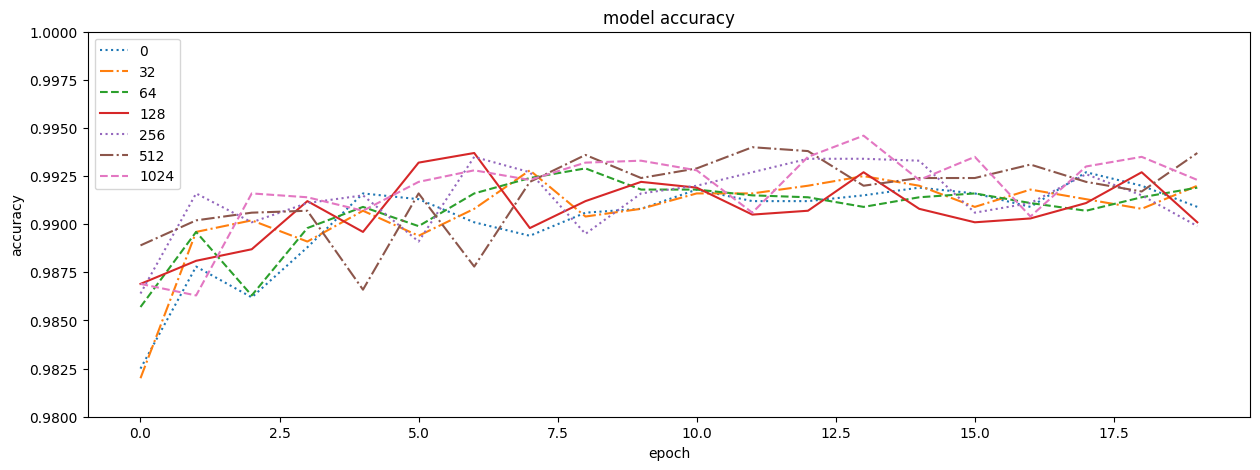

In [28]:
plt.figure(figsize=(15, 5))
for i in range(7):
    plt.plot(h3[i].history['val_accuracy'],linestyle=line_styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(model3_names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

Finally we conclude with our results:

1. 3 Conv layers
2. Dropout of 0.4
3. Filters 32 and 64
4. Dense layer size 128

But there are advanced methods to further increase like using Learning rate decay, batch normalization and data augmentation.

But we shall do only alpha decay and Batch Normalization.


In [29]:
from keras.layers import BatchNormalization

final_model = keras.Sequential()

final_model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=imgpx))
final_model.add(MaxPooling2D((2,2)))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.4))

final_model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
final_model.add(MaxPooling2D((2,2)))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.4))

final_model.add(Flatten())
final_model.add(Dense(128, activation='relu'))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.4))
final_model.add(Dense(10, activation='softmax'))

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
annealer = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

hx = final_model.fit(tX, ty, batch_size=80, epochs = 20, validation_data = (vX, vy), callbacks=[annealer], verbose=0)
print("Epochs={}, Train accuracy={}, Validation accuracy={}".format(20, max(hx.history['accuracy']), max(hx.history['val_accuracy']) ))

Epochs=20, Train accuracy=0.9976000189781189, Validation accuracy=0.995199978351593


See we got accuracy 99.51%